In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,PrecisionRecallDisplay,RocCurveDisplay
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [3]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


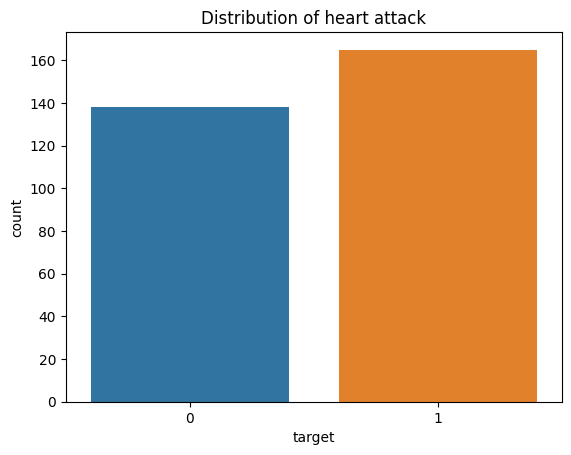

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="target")
plt.title("Distribution of heart attack")
plt.show()

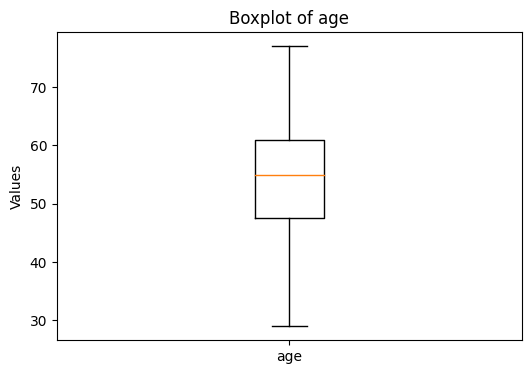

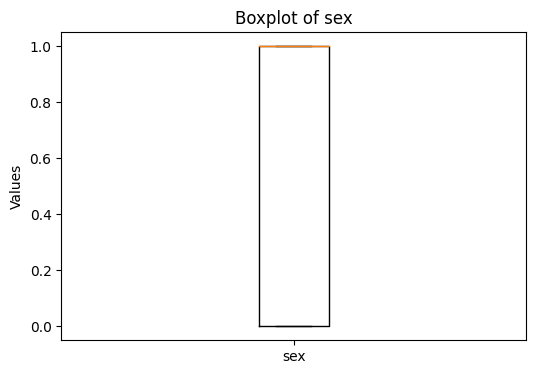

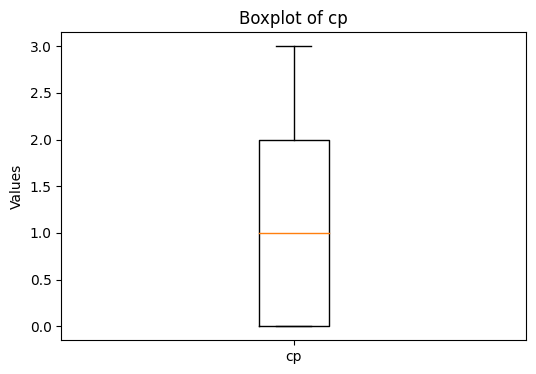

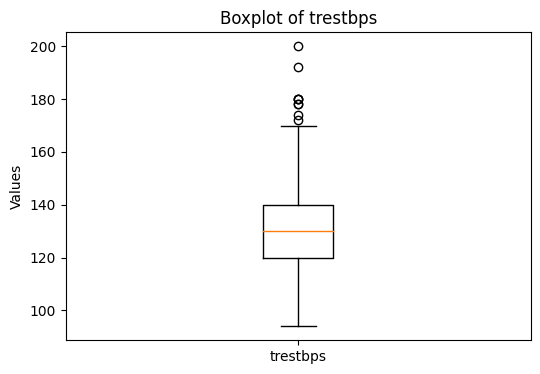

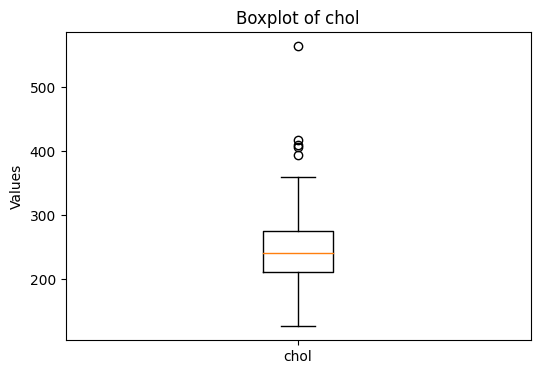

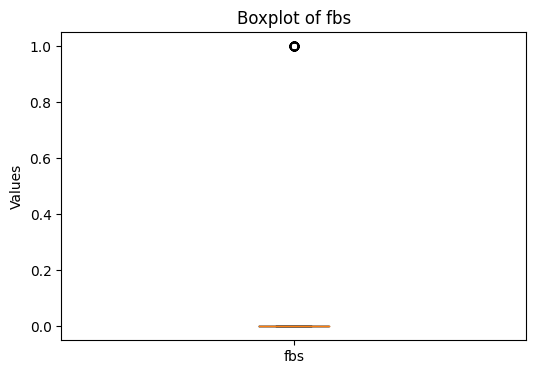

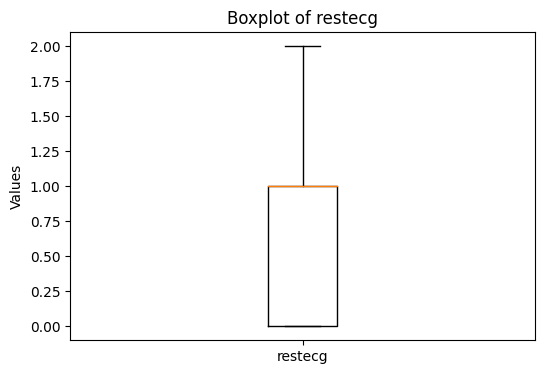

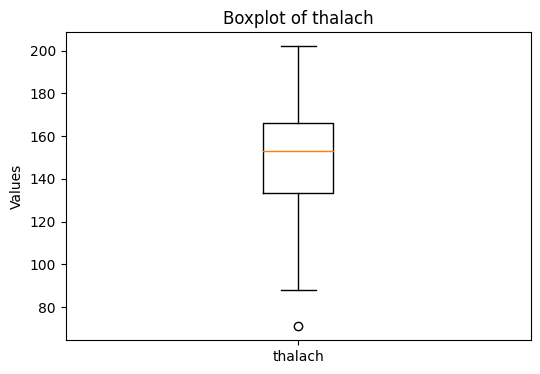

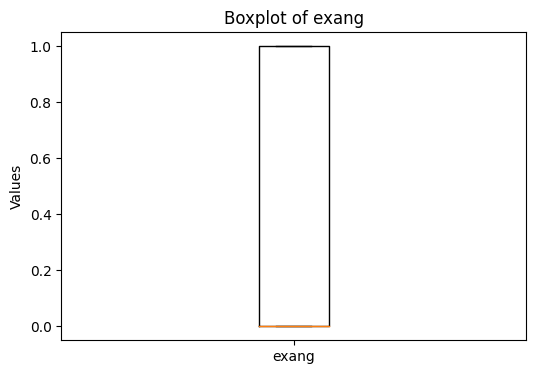

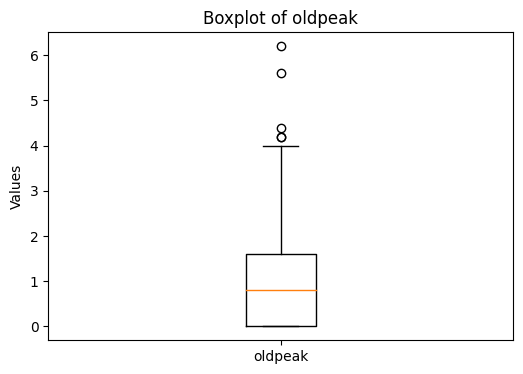

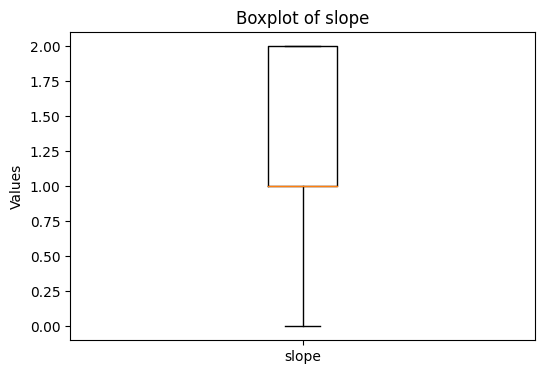

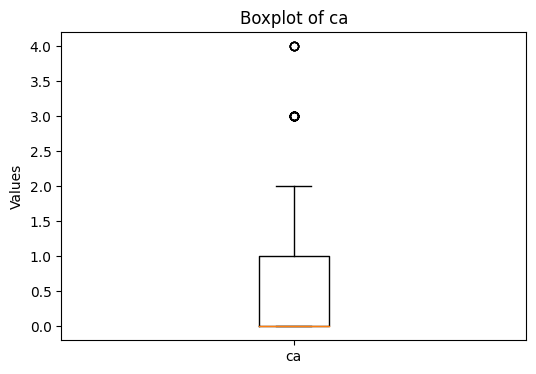

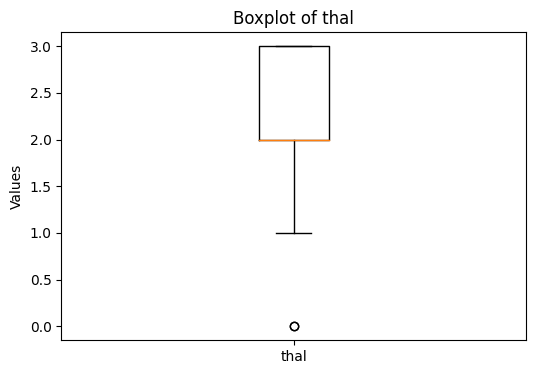

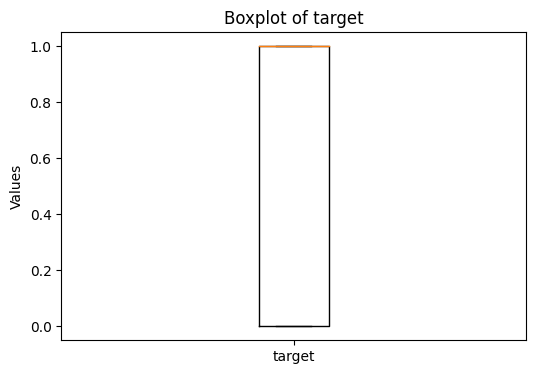

In [5]:
# Boxplot 그리기
numeric_columns = df.select_dtypes(include='number').columns  # 숫자형 열 선택

for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[column].dropna(), labels=[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel('Values')
    plt.show()


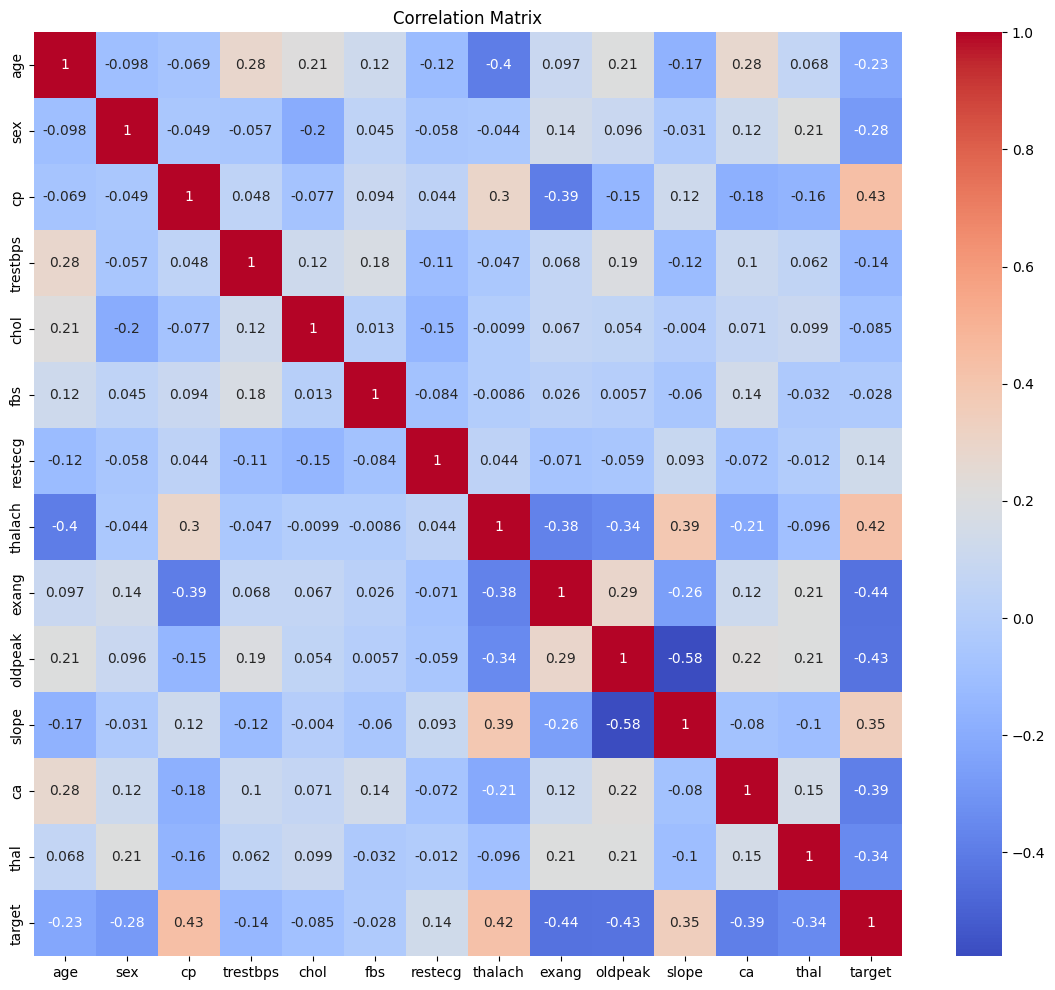

In [6]:
plt.figure(figsize=(14,12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [7]:
X = df.drop("target", axis=1)
y = df["target"]
# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# 학습/테스트 분리하여 테스트 데이터로 성능 평가
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# 로지스틱 회귀 모델 생성
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score, classification_report


# 4. 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8524590163934426

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [9]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# 교차 검증 설정
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 교차 검증 실행 (scaler 적용된 X_scaled와 y 사용)
cv_scores = cross_val_score(model, X_scaled, y, cv=skf, scoring='accuracy')

# 교차 검증 결과 출력
print("교차 검증 정확도:", cv_scores)
print("평균 교차 검증 정확도: {:.2f}%".format(cv_scores.mean() * 100))

교차 검증 정확도: [0.8852459  0.85245902 0.7704918  0.81666667 0.86666667]
평균 교차 검증 정확도: 83.83%


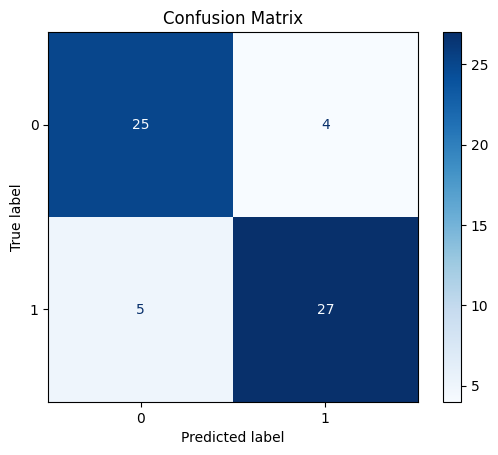

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 혼동 행렬 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


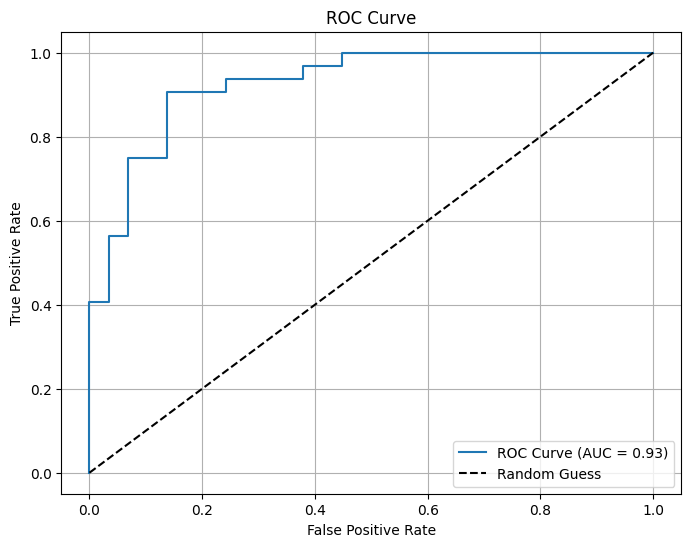

In [11]:
from sklearn.metrics import roc_curve, auc

# ROC 곡선 데이터 계산
y_proba = model.predict_proba(X_test)[:, 1]  # 양성 클래스 확률
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# ROC 곡선 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


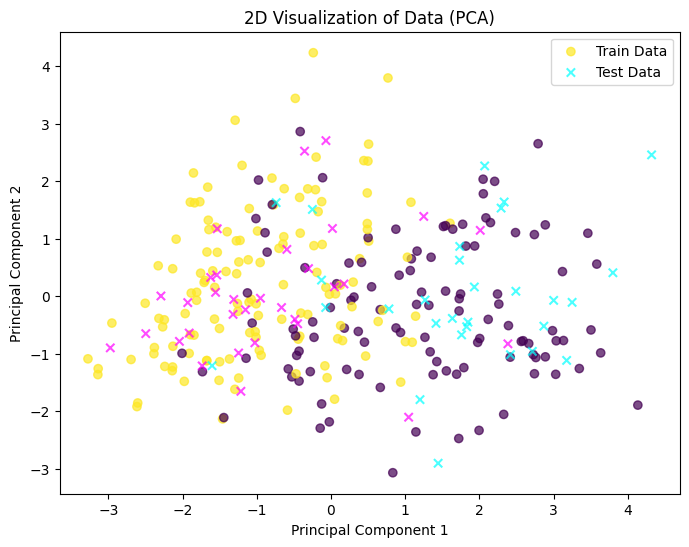

In [12]:
from sklearn.decomposition import PCA
import numpy as np

# PCA로 2D 데이터 변환
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# 2D 데이터 분포 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap='viridis', alpha=0.7, label="Train Data")
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap='cool', alpha=0.7, marker='x', label="Test Data")
plt.title("2D Visualization of Data (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


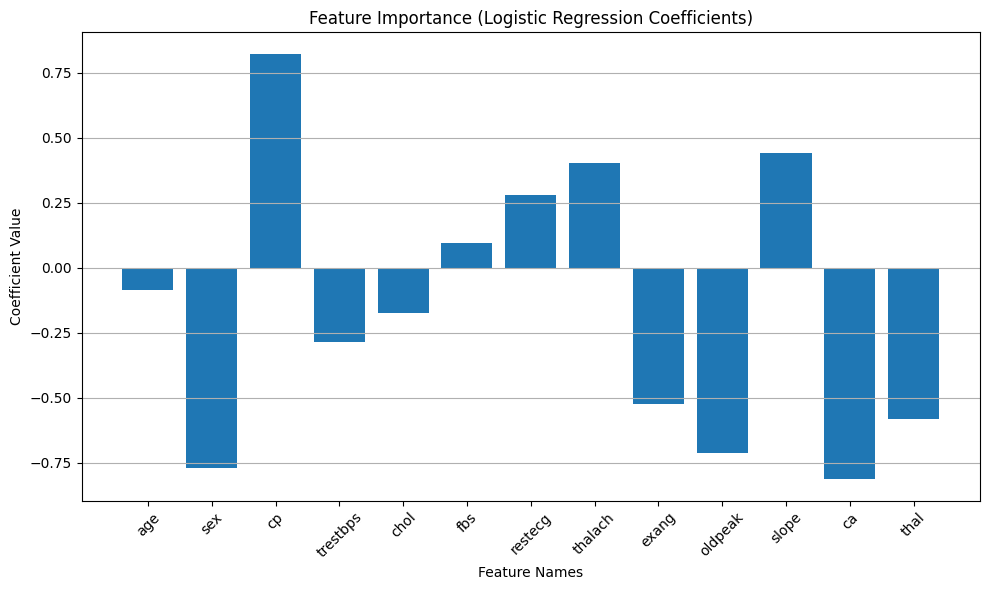

In [13]:
import numpy as np
# Feature 이름 가져오기 (X의 컬럼명)
feature_names = X.columns 

# 특성 중요도 가져오기 (로지스틱 회귀 계수)
feature_importance = model.coef_[0]

# 특성 중요도를 시각화
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Feature Names")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(axis='y')
plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

시각화의 활용:
혼동 행렬: 모델의 정확도와 오류 유형을 직관적으로 확인.
ROC 곡선: 클래스 불균형 데이터에서 모델 성능 평가.
데이터 분포: 데이터의 구조와 클래스 분포 이해.
특성 중요도: 모델이 사용하는 주요 변수 식별.

In [14]:
import statsmodels.api as sm
import pandas as pd

# statsmodels는 상수항 추가가 필요
X_train_const = sm.add_constant(X_train)  # 절편 추가
X_test_const = sm.add_constant(X_test)

# statsmodels를 사용한 로지스틱 회귀 모델 적합
model_sm = sm.Logit(y_train, X_train_const).fit()

# X_train 컬럼명에 상수항('const') 추가
column_names = ['const'] + list(X.columns)

# 결과 출력 (컬럼 이름 적용)
print(model_sm.summary(xname=column_names))

Optimization terminated successfully.
         Current function value: 0.348242
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  242
Model:                          Logit   Df Residuals:                      228
Method:                           MLE   Df Model:                           13
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.4940
Time:                        17:04:59   Log-Likelihood:                -84.274
converged:                       True   LL-Null:                       -166.55
Covariance Type:            nonrobust   LLR p-value:                 2.359e-28
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0330      0.206     -0.160      0.873      -0.437       0.371
age           -0.0795      0.

In [15]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
# VIF 계산 함수 정의
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    X = add_constant(dataframe)  # 상수항 추가
    vif_data['Variable'] = X.columns  # 변수명
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# VIF 계산
vif_result = calculate_vif(df)

# 결과 출력
print(vif_result)

    Variable         VIF
0      const  212.998773
1        age    1.443937
2        sex    1.231356
3         cp    1.397152
4   trestbps    1.180747
5       chol    1.152971
6        fbs    1.087698
7    restecg    1.066721
8    thalach    1.653567
9      exang    1.440147
10   oldpeak    1.744666
11     slope    1.662325
12        ca    1.290729
13      thal    1.191528
14    target    2.072754


In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# 예시용 데이터프레임 가정
# 실제로는 사용자의 데이터를 로드하는 과정이 필요합니다.
# df = pd.read_csv("your_data.csv")

# target 컬럼을 제외한 모든 컬럼을 특성 X로, target 컬럼을 y로 설정
X = df.drop("target", axis=1)
y = df["target"]

# 학습용 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 필요 시 스케일링 (선택사항)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 랜덤 포레스트 모델 생성
# n_estimators: 트리 개수, max_depth: 트리 최대 깊이 등 하이퍼파라미터 조정 가능
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 분류 보고서
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 특성 중요도 확인
importances = model.feature_importances_
feature_names = X.columns

# 특성 중요도 정렬 및 출력
feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

print("\nFeature Importances:\n", feature_importances)


Accuracy: 0.8360655737704918

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Feature Importances:
      feature  importance
9    oldpeak    0.128485
7    thalach    0.119725
11        ca    0.115533
2         cp    0.103792
12      thal    0.093300
0        age    0.092811
3   trestbps    0.077537
8      exang    0.075809
4       chol    0.074812
10     slope    0.051058
1        sex    0.035658
6    restecg    0.019782
5        fbs    0.011698


In [17]:
import numpy as np

# Feature Importances 데이터 (중요도 내림차순으로 정렬했다고 가정)
feature_importances = [
    0.128485, 0.119725, 0.115533, 0.103792, 0.093300, 
    0.092811, 0.077537, 0.075809, 0.074812, 0.051058, 
    0.035658, 0.019782, 0.011698
]

# 누적 중요도 계산
cumulative_importance = np.cumsum(feature_importances)

# 누적 중요도가 80% 이상이 되는 변수 개수 찾기
threshold = 0.8
num_features = np.argmax(cumulative_importance >= threshold) + 1

print(f"누적 중요도 {threshold*100}%를 달성하기 위한 변수 개수: {num_features}")


누적 중요도 80.0%를 달성하기 위한 변수 개수: 8


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# df는 이미 로드되어 있고 'target' 컬럼이 존재한다고 가정

# X와 y 설정
X = df.drop(["target", "chol", "slope", "sex", "restecg", "fbs"], axis=1)
y = df["target"]

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습/테스트 분리하여 테스트 데이터로 성능 평가
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 및 분류 보고서 출력
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8852459016393442

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [48]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# 교차 검증 설정
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 교차 검증 실행 (scaler 적용된 X_scaled와 y 사용)
cv_scores = cross_val_score(model, X_scaled, y, cv=skf, scoring='accuracy')

# 교차 검증 결과 출력
print("교차 검증 정확도:", cv_scores)
print("평균 교차 검증 정확도: {:.2f}%".format(cv_scores.mean() * 100))


교차 검증 정확도: [0.93548387 0.90322581 0.93548387 0.86666667 0.73333333 0.73333333
 0.9        0.7        0.9        0.73333333]
평균 교차 검증 정확도: 83.41%


In [53]:
from sklearn.model_selection import cross_val_score
from itertools import combinations

best_score = 0
best_features = None

for r in range(1, len(X.columns) + 1):
    for subset in combinations(X.columns, r):
        X_subset = X[list(subset)]
        scores = cross_val_score(model, X_subset, y, cv=5, scoring='accuracy')
        if scores.mean() > best_score:
            best_score = scores.mean()
            best_features = subset

print("최적 변수 조합:", best_features)
print("최고 교차 검증 점수:", best_score)


최적 변수 조합: ('sex', 'cp', 'fbs', 'restecg', 'thalach', 'exang', 'slope', 'ca', 'thal')
최고 교차 검증 점수: 0.8545901639344262


In [ ]:
bins = [0, 59, 69, float('inf')]  # 나이 범위
labels = [1, 2, 3]  # 숫자로 범주화된 레이블

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True).astype(int)

# 결과 출력
print(df)

In [ ]:
# 혈압 범주화
bins = [0, 119, 139, 159, float('inf')]  # 혈압 범위
labels = [1, 2, 3, 4]  # 숫자로 범주화된 레이블

df['trestbps_group'] = pd.cut(df['trestbps'], bins=bins, labels=labels, right=True).astype(int)

# 결과 출력
print(df)

In [ ]:
# 콜레스테롤 기준에 따른 범주화
bins = [0, 199, 239, float('inf')]  # 콜레스테롤 범위
labels = [1, 2, 3]  # 숫자로 범주화된 레이블

df['chol_category'] = pd.cut(df['chol'], bins=bins, labels=labels, right=True).astype(int)

# 결과 출력
print(df)

In [ ]:
# 심박수 기준에 따른 범주화
bins = [0, 99, 139, float('inf')]  # 심박수 범위
labels = [1, 2, 3]  # 숫자로 범주화된 레이블

df['thalach_category'] = pd.cut(df['thalach'], bins=bins, labels=labels, right=True).astype(int)

# 결과 출력
print(df)

In [ ]:
# Oldpeak 기준에 따른 범주화
bins = [0, 1.0, 2.0, float('inf')]  # Oldpeak 범위
labels = [1, 2, 3]  # 숫자로 범주화된 레이블

df['oldpeak_category'] = pd.cut(
    df['oldpeak'], 
    bins=bins, 
    labels=labels, 
    right=True, 
    include_lowest=True  # 첫 번째 경계 포함
)

# NaN 값이 있는 경우 처리
df['oldpeak_category'] = df['oldpeak_category'].cat.add_categories([0]).fillna(0).astype(int)

# 결과 출력
print(df)

In [ ]:
#age_group: 낮은 나이부터 1->2->3
#trestbps_group: 정상부터 고혈압까지 1->2->3->4
#chol_group: 정상부터 고농도 콜레스테롤까지 1->2->3
#thalach_category: 최대 심박수 낮음부터 높음까지 1->2->3
#oldpeak_category: 정상부터 위험기울기까지 1->2->3

In [ ]:
df.to_csv('heart_cate.csv')